In [1]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import matplotlib.pyplot as plt
from opinions import OpinionModel

In [2]:
nsteps=500
nagents=20
model = OpinionModel(nagents)

In [3]:
for i in range(nsteps):
    model.step()

In [4]:
agent_opinion = model.datacollector.get_agent_vars_dataframe()

In [5]:
x=agent_opinion.as_matrix().reshape((nsteps,nagents))

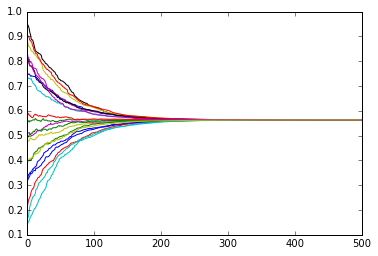

In [6]:
plt.plot(x)